In [10]:
import pandas as pd

# Load the CSV file (change 'your_file.csv' to your actual file path)
df = pd.read_csv('calls.csv')

# Extract the first 10 rows
extracted_data = df.head(10)

# Display the extracted rows
print(extracted_data)


      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057       8/1/2024 0:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324       8/1/2024 0:05   
4  1211603231   5214456437    721730       8/1/2024 0:04   
5  5297766997   5590154991    817160       8/1/2024 0:11   
6   324593040   6774865122    519057       8/1/2024 0:08   
7  8902603117   7974326984    488324       8/1/2024 0:13   
8  7222687732   8023417234    957331       8/1/2024 0:14   
9  4113684017   1528835057    158319       8/1/2024 0:20   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   
5           8/1/2024 0:16     8/1/2024 0:40   
6         

neutral       42758
calm          24675
frustrated     3684
angry           389
polite           87
Name: agent_tone, dtype: int64


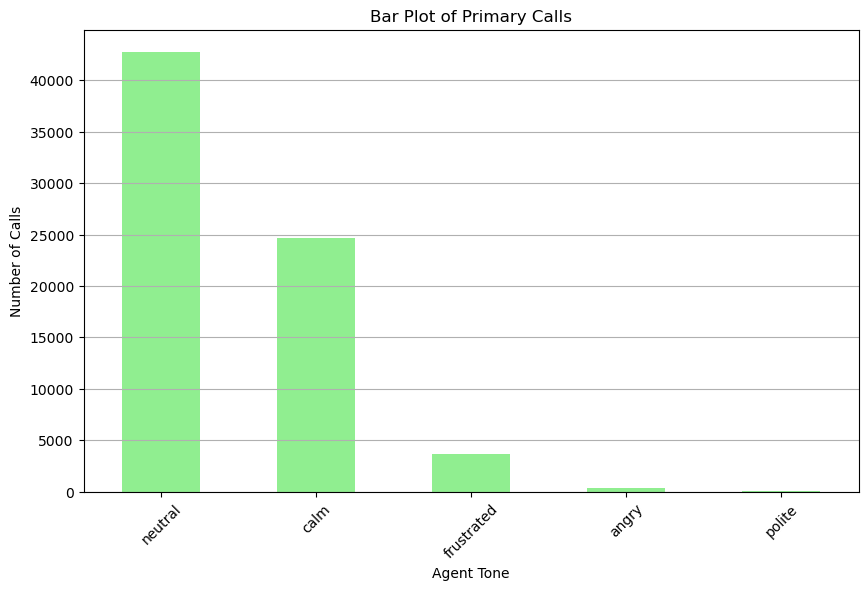

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual file)
df = pd.read_csv('sentiment_statistics.csv')

# Count occurrences of each call reason
call_reasons = df['agent_tone'].value_counts()
print(call_reasons)
# Create the bar plot
plt.figure(figsize=(10,6))
call_reasons.plot(kind='bar', color='lightgreen')  # Create a bar plot
plt.title('Bar Plot of Primary Calls')  # Title of the plot
plt.xlabel('Agent Tone')  # X-axis label
plt.ylabel('Number of Calls')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True, axis='y')  # Add a grid to the y-axis

# Show the plot
plt.show()

neutral       14444
angry         14408
polite        14371
calm          14347
frustrated    14240
Name: customer_tone, dtype: int64


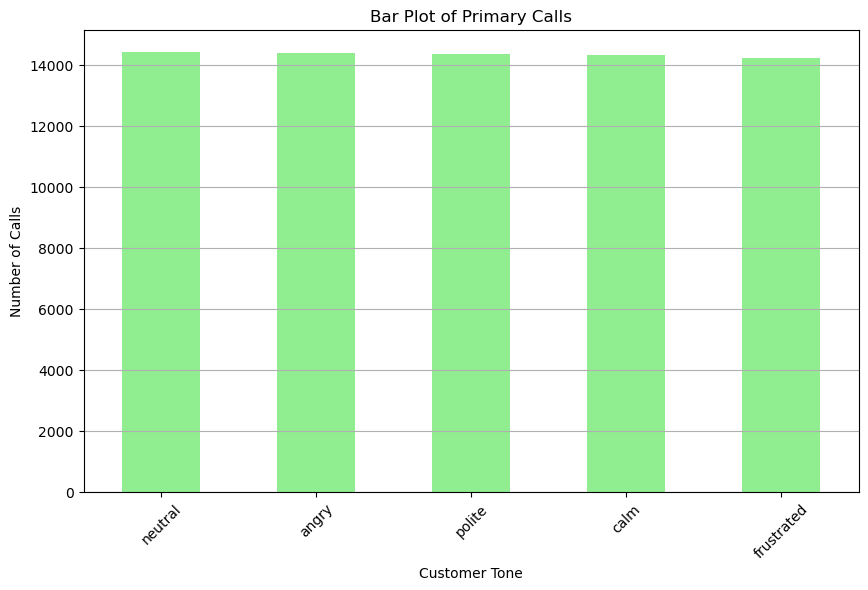

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual file)
df = pd.read_csv('sentiment_statistics.csv')

# Count occurrences of each call reason
call_reasons = df['customer_tone'].value_counts()
print(call_reasons)

# Create the bar plot
plt.figure(figsize=(10,6))
call_reasons.plot(kind='bar', color='lightgreen')  # Create a bar plot
plt.title('Bar Plot of Primary Calls')  # Title of the plot
plt.xlabel('Customer Tone')  # X-axis label
plt.ylabel('Number of Calls')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True, axis='y')  # Add a grid to the y-axis

# Show the plot
plt.show()

In [13]:
df = pd.read_csv('reason.csv')
df['primary_call_reason'] = df['primary_call_reason'].replace('IRROPS  ', 'IRROPS')

# View the changes (optional)
print(df.head())

# Optionally, save the updated DataFrame back to a new CSV file
df.to_csv('reason.csv', index=False)

      call_id primary_call_reason
0  4667960400    Voluntary Cancel
1  1122072124             Booking
2  6834291559              IRROPS
3  2266439882             Upgrade
4  1211603231             Seating


IRROPS                   13311
Voluntary Change         10848
Seating                   6365
Mileage Plus              5851
Post-Flight               4330
Communications            3840
Products and Services     3332
Baggage                   2832
Upgrade                   2738
Booking                   2637
Check-In                  1904
Checkout                  1888
Voluntary Cancel          1607
Digital Support           1225
ETC                        952
Traveler Updates           937
Other Topics               818
Schedule Change            731
Disability                 403
Unaccompanied Minor        104
Name: primary_call_reason, dtype: int64


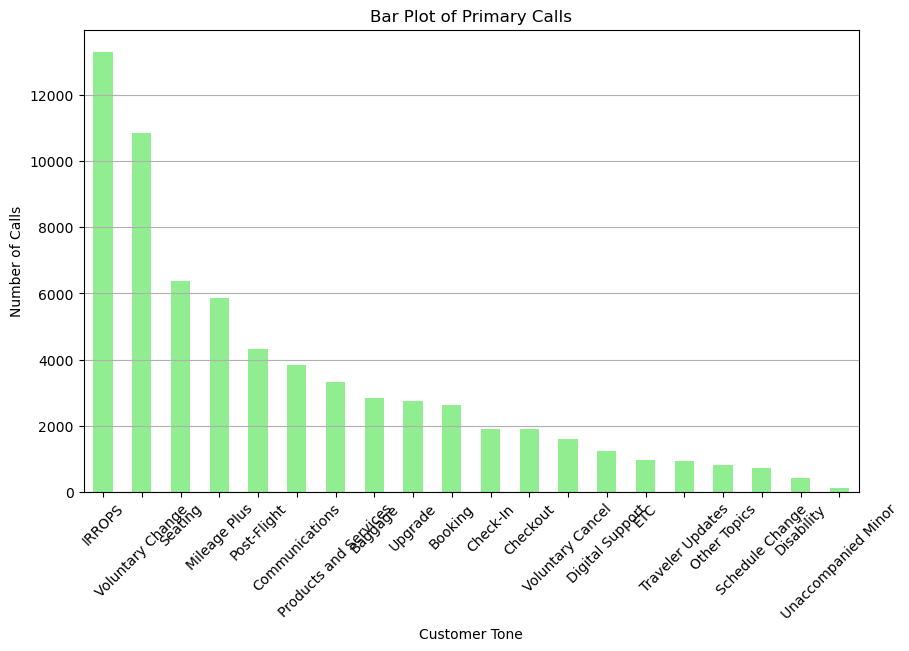

In [14]:
df = pd.read_csv('reason.csv')

# Count occurrences of each call reason
call_reasons = df['primary_call_reason'].value_counts()
print(call_reasons)

# Create the bar plot
plt.figure(figsize=(10,6))
call_reasons.plot(kind='bar', color='lightgreen')  # Create a bar plot
plt.title('Bar Plot of Primary Calls')  # Title of the plot
plt.xlabel('Customer Tone')  # X-axis label
plt.ylabel('Number of Calls')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True, axis='y')  # Add a grid to the y-axis

# Show the plot
plt.show()

In [15]:
df1 = pd.read_csv('calls.csv')
df2 = pd.read_csv('reason.csv')

# Merge the two DataFrames on the 'call_id' column (assuming it's unique for each call)
df = pd.merge(df1, df2, on='call_id')

df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['agent_assigned_datetime'] = pd.to_datetime(df['agent_assigned_datetime'])
# Calculate the call duration (in seconds) for the filtered data
filtered_df = df[df['primary_call_reason'] == 'IRROPS']

filtered_df['call_duration'] = (filtered_df['agent_assigned_datetime'] - filtered_df['call_start_datetime']).dt.total_seconds()

average_duration_most = filtered_df['call_duration'].mean()

# Print the average
print(f"Average wait Duration for the most frequent reason for calling: {average_duration_most}")


Average wait Duration for the most frequent reason for calling: 360.0811359026369


C:\Users\balus\AppData\Local\Temp\ipykernel_21432\1824709774.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['call_duration'] = (filtered_df['agent_assigned_datetime'] - filtered_df['call_start_datetime']).dt.total_seconds()


In [16]:
df1 = pd.read_csv('calls.csv')
df2 = pd.read_csv('reason.csv')

# Merge the two DataFrames on the 'call_id' column (assuming it's unique for each call)
df = pd.merge(df1, df2, on='call_id')

df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['agent_assigned_datetime'] = pd.to_datetime(df['agent_assigned_datetime'])
# Calculate the call duration (in seconds) for the filtered data
filtered_df = df[df['primary_call_reason'] == 'Unaccompanied Minor']

filtered_df['call_duration'] = (filtered_df['agent_assigned_datetime'] - filtered_df['call_start_datetime']).dt.total_seconds()

average_duration_least = filtered_df['call_duration'].mean()

# Print the average
print(f"Average wait Duration: {average_duration_least}")

print("Percentage change is",(average_duration_least/average_duration_most)*100)

Average wait Duration: 688.2692307692307
Percentage change is 191.1428181440011


C:\Users\balus\AppData\Local\Temp\ipykernel_21432\593007065.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['call_duration'] = (filtered_df['agent_assigned_datetime'] - filtered_df['call_start_datetime']).dt.total_seconds()


In [17]:
print(df.head())


      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118 2024-07-31 23:56:00   
1  1122072124   8186702651    519057 2024-08-01 00:03:00   
2  6834291559   2416856629    158319 2024-07-31 23:59:00   
3  2266439882   1154544516    488324 2024-08-01 00:05:00   
4  1211603231   5214456437    721730 2024-08-01 00:04:00   

  agent_assigned_datetime call_end_datetime  \
0     2024-08-01 00:03:00     8/1/2024 0:34   
1     2024-08-01 00:06:00     8/1/2024 0:18   
2     2024-08-01 00:07:00     8/1/2024 0:26   
3     2024-08-01 00:10:00     8/1/2024 0:17   
4     2024-08-01 00:14:00     8/1/2024 0:23   

                                     call_transcript primary_call_reason  
0  \n\nAgent: Thank you for calling United Airlin...    Voluntary Cancel  
1  \n\nAgent: Thank you for calling United Airlin...             Booking  
2  \n\nAgent: Thank you for calling United Airlin...              IRROPS  
3  \n\nAgent: Thank you for calling United Airlin...    

In [18]:
# Convert 'call_start_datetime' and 'call_end_datetime' to datetime format if not already done
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'])

# Calculate call duration in seconds (if not already present in the dataset)
df['call_duration'] = (df['call_end_datetime'] - df['call_start_datetime']).dt.total_seconds()

# Calculate the average call duration
average_duration = df['call_duration'].mean()

# Filter rows where call duration is greater than the average
long_duration_calls = df[df['call_duration'] > average_duration]

# View the reasons for longer duration calls
reasons_for_long_calls = long_duration_calls['primary_call_reason'].value_counts()

# Print the results
print(f"Average Call Duration: {average_duration}")
print("Reasons for Longer Duration Calls:")
print(reasons_for_long_calls)


Average Call Duration: 1134.1488005041033
Reasons for Longer Duration Calls:
IRROPS                   4820
Voluntary Change         4244
Mileage Plus             2723
Post-Flight              2331
Seating                  1780
Checkout                 1426
Communications           1209
Products and Services    1078
Upgrade                   711
Voluntary Cancel          605
ETC                       530
Baggage                   474
Check-In                  362
Booking                   308
Traveler Updates          283
Digital Support           211
Schedule Change           112
Other Topics               81
Disability                 37
Unaccompanied Minor        37
Name: primary_call_reason, dtype: int64


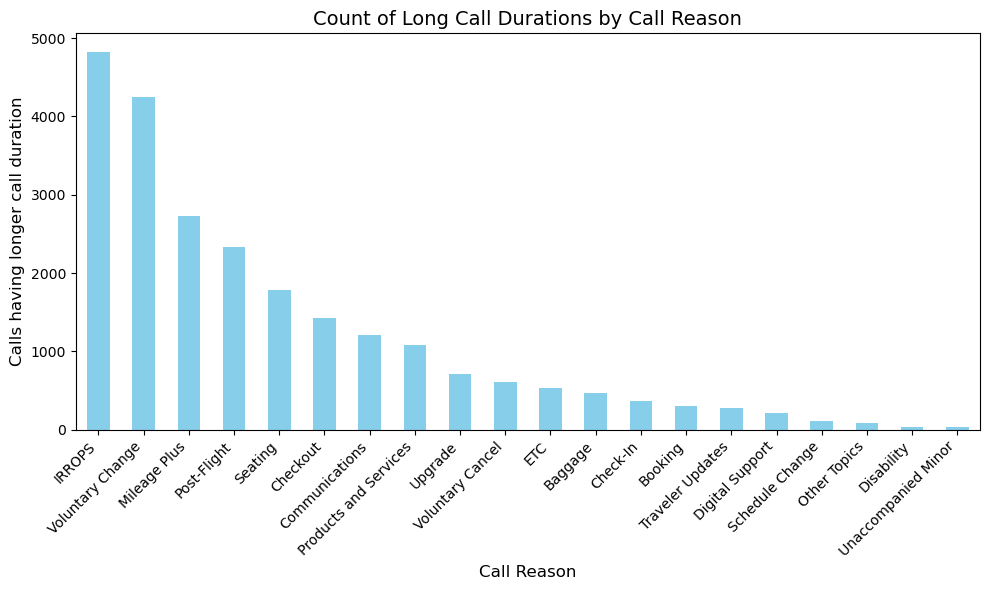

In [39]:
# Plotting the data as a bar graph
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a bar graph of call reasons and their corresponding long call counts
reasons_for_long_calls.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Count of Long Call Durations by Call Reason', fontsize=14)
plt.xlabel('Call Reason', fontsize=12)
plt.ylabel('Calls having longer call duration'.format(average_duration), fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cut-offs
plt.show()

      primary_call_reason  call_duration_long  percentage_contribution
0                 Baggage            736260.0                 1.665355
1                 Booking            568380.0                 1.285625
2                Check-In            794040.0                 1.796048
3                Checkout           2869680.0                 6.490961
4          Communications           2395620.0                 5.418680
5         Digital Support            336840.0                 0.761902
6              Disability             55380.0                 0.125265
7                     ETC           1081140.0                 2.445443
8                  IRROPS           9230160.0                20.877803
9            Mileage Plus           5653860.0                12.788529
10           Other Topics            134340.0                 0.303865
11            Post-Flight           4826820.0                10.917838
12  Products and Services           2023200.0                 4.576299
13    

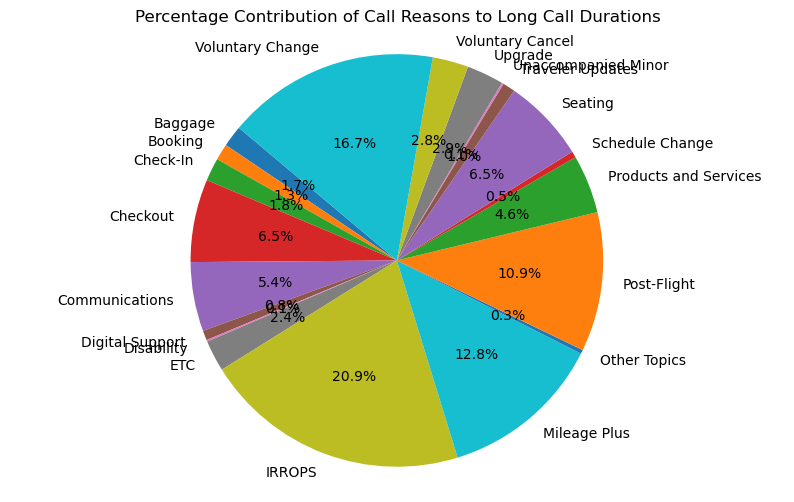

In [37]:
# Calculate total duration of long calls
total_long_duration = long_calls['call_duration'].sum()

# Calculate total duration of calls for each call reason
call_reason_duration = df.groupby('primary_call_reason')['call_duration'].sum().reset_index()

# Filter for only the long calls to get their durations per reason
long_call_reason_duration = long_calls.groupby('primary_call_reason')['call_duration'].sum().reset_index()

# Merge the two DataFrames to get both durations
contribution_df = pd.merge(call_reason_duration, long_call_reason_duration, on='primary_call_reason', how='left', suffixes=('_total', '_long'))

# Fill NaN values with 0 for reasons that had no long calls
contribution_df['call_duration_long'] = contribution_df['call_duration_long'].fillna(0)

# Calculate the percentage contribution of each call reason to long calls
contribution_df['percentage_contribution'] = (contribution_df['call_duration_long'] / total_long_duration) * 100

# Display the result
print(contribution_df[['primary_call_reason', 'call_duration_long', 'percentage_contribution']])


# Create a pie chart for the percentage contributions
plt.figure(figsize=(10, 6))
plt.pie(
    contribution_df['percentage_contribution'],
    labels=contribution_df['primary_call_reason'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage Contribution of Call Reasons to Long Call Durations')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

In [38]:
print(contribution_df[['percentage_contribution']].sum())


percentage_contribution    100.0
dtype: float64


In [26]:

# Load the first CSV file (reason.csv)
df_reason = pd.read_csv('reason.csv')

# Load the second CSV file (customers.csv)
df_customers = pd.read_csv('customers.csv')

# Rename 'customer_id' to 'call_id' in the customers DataFrame to have a common column for merging
df_customers.rename(columns={'customer_id': 'call_id'}, inplace=True)

# Merge the two DataFrames on 'call_id'
merged_df = pd.merge(df_reason, df_customers[['call_id', 'elite_level_code']], on='call_id', how='inner')

# Display the first few rows of the merged DataFrame
print(merged_df.head(5))


      call_id primary_call_reason  elite_level_code
0  3922687218    Voluntary Cancel               0.0


In [28]:
# Ensure that the 'call_duration' column is numeric
df['call_duration'] = pd.to_numeric(df['call_duration'], errors='coerce')

# Sort the DataFrame by 'call_duration' in descending order
df_sorted = df.sort_values(by='call_duration', ascending=False)

# Select the top 10 rows (longest call durations)
top_10_longest_calls = df_sorted[['call_id','call_duration', 'call_transcript', 'primary_call_reason']].head(10)

# Display the top 10 longest calls along with their transcripts and primary call reasons
print(top_10_longest_calls)


          call_id  call_duration  \
37944  4731148582         7740.0   
570    4624041541         7740.0   
40061  2709126688         7680.0   
25595  9533665435         7620.0   
42479  8667461364         7560.0   
43631  3756159451         7560.0   
2756   1557447040         7560.0   
56720  4220984268         7560.0   
29208  4520420821         7500.0   
22952  8990385097         7500.0   

                                         call_transcript  \
37944  \n\nAgent: Thank you for calling United Airlin...   
570    \n\nAgent: Thank you for calling United Airlin...   
40061  \n\nAgent: Thank you for calling United Airlin...   
25595  \n\nAgent: Thank you for calling United Airlin...   
42479  \n\nAgent: Thank you for calling United Airlin...   
43631  \n\nAgent: Thank you for calling United Airlin...   
2756   \n\nAgent: Thank you for calling United Airlin...   
56720  \n\nAgent: Thank you for calling United Airlin...   
29208  \n\nAgent: Thank you for calling United Airlin...   
229

In [30]:
# Sort the DataFrame by 'call_duration' in ascending order
df_sorted = df.sort_values(by='call_duration', ascending=True)

# Select the top 10 rows (shortest call durations)
top_10_shortest_calls = df_sorted[['call_id','call_duration', 'call_transcript', 'primary_call_reason']].head(10)

# Display the top 10 shortest calls along with their transcripts and primary call reasons
print(top_10_shortest_calls)

          call_id  call_duration  \
34000   440419138          180.0   
39980  8676275160          180.0   
35344  8078594976          180.0   
37763  8049484303          180.0   
2809   4325368592          180.0   
8834   8646724669          180.0   
39866  4704315901          180.0   
5076   7323647480          180.0   
57984  9098892743          180.0   
5080   8303129238          180.0   

                                         call_transcript  \
34000  \n\nAgent: Thank you for calling United Airlin...   
39980  \n\nAgent: Thank you for calling United Airlin...   
35344  \n\nAgent: Thank you for calling United Airlin...   
37763  \n\nAgent: Thank you for calling United Airlin...   
2809   \n\nAgent: Thank you for calling United Airlin...   
8834   \n\nAgent: Thank you for calling United Airlin...   
39866  \n\nAgent: Thank you for calling United Airlin...   
5076   \n\nAgent: Thank you for calling United Airlin...   
57984  \n\nAgent: Thank you for calling United Airlin...   
508

In [34]:
# Filter the DataFrame for the specific primary call reason (e.g., "xyz type")
filtered_df = df[df['primary_call_reason'] == 'Communications'] #checkout/communications/traveller update/etc

# Sort the filtered DataFrame by call duration in descending order
sorted_df = filtered_df.sort_values(by='call_duration', ascending=False)

# Select the first 5 longest call durations
top_5_longest_calls = sorted_df.head(5)

# Display the result
print(top_5_longest_calls[['call_id', 'call_start_datetime', 'call_end_datetime', 'call_duration', 'primary_call_reason']])

          call_id call_start_datetime   call_end_datetime  call_duration  \
2863   1531372126 2024-08-03 06:03:00 2024-08-03 08:04:00         7260.0   
61152  7838047938 2024-08-30 08:07:00 2024-08-30 10:07:00         7200.0   
7028   2585542910 2024-08-04 01:36:00 2024-08-04 03:35:00         7140.0   
61788  1100048244 2024-08-30 15:23:00 2024-08-30 17:22:00         7140.0   
5772   2587134652 2024-08-03 16:33:00 2024-08-03 18:21:00         6480.0   

      primary_call_reason  
2863       Communications  
61152      Communications  
7028       Communications  
61788      Communications  
5772       Communications  
